In [1]:
import csv
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
# Load data from the train data csv file
Feature = []
Label = []
with open('data/train/train.csv', 'r') as f:
    reader = csv.reader(f)
    train_data = list(reader)
    # remove the first row
    train_data = train_data[1:]
    for row in train_data:
        Feature.append(np.array([float(x) for x in row[1:-1]]))
        Label.append(row[-1])  
Features = np.array(Feature)
Labels = np.array(Label)

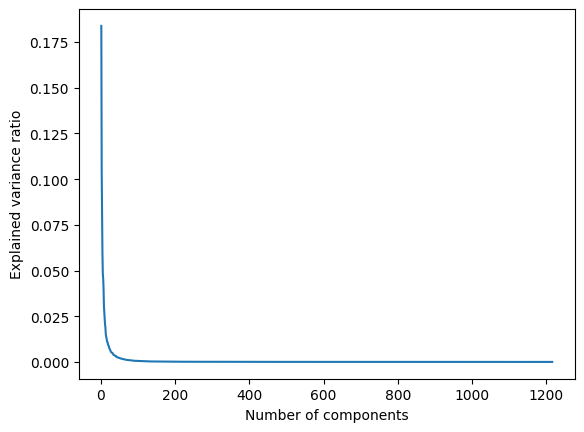

The optimal number of components for PCA is 90


In [3]:
# perform the elbow method to find the optimal number of components for PCA
pca = PCA()
pca.fit(Features)
explained_variance_ratio = pca.explained_variance_ratio_
# plot the explained variance ratio against the number of components for PCA
plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()
# find the optimal number of components for PCA
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
optimal_number_of_components_pca = np.argmax(cumulative_explained_variance_ratio > 0.95) + 1
print('The optimal number of components for PCA is', optimal_number_of_components_pca)

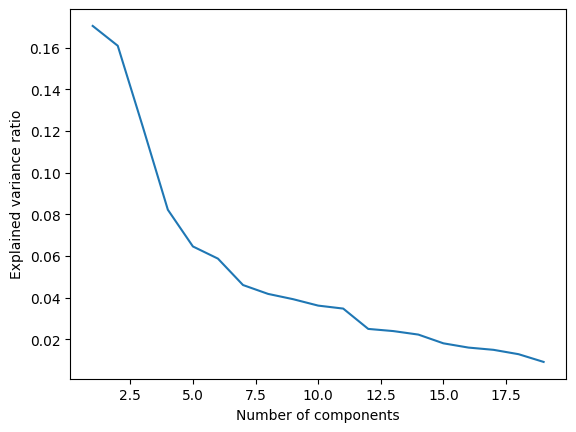

The optimal number of components for LDA is 16


In [4]:
# determining the optimal number of components for LDA
lda = LinearDiscriminantAnalysis()
lda.fit(Features, Labels)
explained_variance_ratio = lda.explained_variance_ratio_
# plot the explained variance ratio against the number of components for LDA
plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()
# find the optimal number of components for LDA
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
optimal_number_of_components_lda = np.argmax(cumulative_explained_variance_ratio > 0.95) + 1
print('The optimal number of components for LDA is', optimal_number_of_components_lda)

In [5]:
# perform PCA on the train data with the optimal number of components
pca = PCA(n_components=optimal_number_of_components_pca)
pca.fit(Features)
Features = pca.transform(Features)

In [6]:
# perform LDA on the train data with the optimal number of components
lda = LinearDiscriminantAnalysis(n_components=optimal_number_of_components_lda)
lda.fit(Features, Labels)
Features = lda.transform(Features)

The accuracy of KNN with 1 neighbors is 1.0
The accuracy of KNN with 2 neighbors is 0.8873355263157895
The accuracy of KNN with 3 neighbors is 0.884046052631579
The accuracy of KNN with 4 neighbors is 0.8807565789473685
The accuracy of KNN with 5 neighbors is 0.8774671052631579
The accuracy of KNN with 6 neighbors is 0.8700657894736842
The accuracy of KNN with 7 neighbors is 0.868421052631579
The accuracy of KNN with 8 neighbors is 0.865953947368421
The accuracy of KNN with 9 neighbors is 0.865953947368421
The accuracy of KNN with 10 neighbors is 0.8601973684210527
The accuracy of KNN with 11 neighbors is 0.8577302631578947
The accuracy of KNN with 12 neighbors is 0.8519736842105263
The accuracy of KNN with 13 neighbors is 0.8511513157894737
The accuracy of KNN with 14 neighbors is 0.8462171052631579
The accuracy of KNN with 15 neighbors is 0.8462171052631579
The accuracy of KNN with 16 neighbors is 0.8412828947368421
The accuracy of KNN with 17 neighbors is 0.8396381578947368
The accu

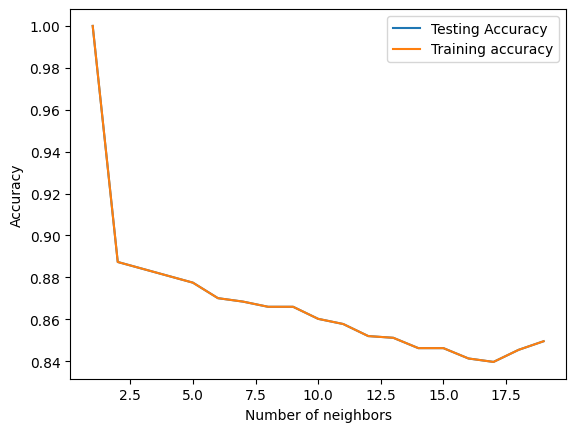

The optimal number of neighbors for KNN is 1


In [7]:
# determine the optimal number of neighbors for KNN
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Features, Labels)
    train_accuracy[i] = knn.score(Features, Labels)
    test_accuracy[i] = knn.score(Features, Labels)
    print('The accuracy of KNN with', k, 'neighbors is', test_accuracy[i])
# plot the accuracy against the number of neighbors
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
# find the optimal number of neighbors for KNN
optimal_number_of_neighbors = np.argmax(test_accuracy) + 1
print('The optimal number of neighbors for KNN is', optimal_number_of_neighbors)

In [8]:
# perform k nearest neighbour classification with the optimal number of neighbours
knn = KNeighborsClassifier(n_neighbors = optimal_number_of_neighbors)
knn.fit(Features, Labels)

KNeighborsClassifier(n_neighbors=1)

In [9]:
with open('data/test/test.csv', 'r' ) as f:
    reader = csv.reader(f)
    test_data = list(reader)
    test_data = test_data[1:]
    test_features = []
    for row in test_data:
        test_features.append(np.array([float(x) for x in row[1:]]))
    test_features = np.array(test_features)
    test_features = pca.transform(test_features)
    test_features = lda.transform(test_features)
    test_labels = knn.predict(test_features)
    with open('data/test/submission_29_results.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['Id', 'Category'])
        for i in range(len(test_labels)):
            writer.writerow([i, test_labels[i]])    